In [7]:
import numpy as np
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import explained_variance_score, mean_squared_error

# Load datasets
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Standardize the datasets
scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)
X_diabetes = scaler.fit_transform(X_diabetes)

In [54]:
# load_diabetes()

In [35]:
def apply_randomized_projections(X, n_components, dataset_name):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_rp = rp.fit_transform(X)
    
    print(f"Randomized Projections on {dataset_name}:")
    print(f"Explained Variance Score: {explained_variance_score(X, rp.inverse_transform(X_rp)):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(X, rp.inverse_transform(X_rp)):.2f}\n")
    
    return X_rp

def apply_pca(X, n_components, dataset_name):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)
    
    print(f"PCA on {dataset_name}:")
    print(f"Explained Variance Ratio: {np.sum(pca.explained_variance_ratio_):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(X, pca.inverse_transform(X_pca)):.2f}\n")
    
    return X_pca

def apply_ica(X, n_components, dataset_name):
    ica = FastICA(n_components=n_components, random_state=42)
    X_ica = ica.fit_transform(X)
    
    print(f"ICA on {dataset_name}:")
    print(f"Explained Variance Score: {explained_variance_score(X, ica.inverse_transform(X_ica)):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(X, ica.inverse_transform(X_ica)):.2f}\n")
    
    return X_ica

In [47]:
# Number of components (for iris, let's keep 2, and for diabetes, let's keep 10)
n_components_iris = 2
n_components_diabetes = 10

# Randomized Projections
X_iris_rp = apply_randomized_projections(X_iris, n_components_iris, "Iris")
X_diabetes_rp = apply_randomized_projections(X_diabetes, n_components_diabetes, "Diabetes")

# PCA
X_iris_pca = apply_pca(X_iris, n_components_iris, "Iris")
X_diabetes_pca = apply_pca(X_diabetes, n_components_diabetes, "Diabetes")

# ICA
X_iris_ica = apply_ica(X_iris, n_components_iris, "Iris")
X_diabetes_ica = apply_ica(X_diabetes, n_components_diabetes, "Diabetes")

Randomized Projections on Iris:
Explained Variance Score: 0.62
Mean Squared Error: 0.38

Randomized Projections on Diabetes:
Explained Variance Score: 1.00
Mean Squared Error: 0.00

PCA on Iris:
Explained Variance Ratio: 0.96
Mean Squared Error: 0.04

PCA on Diabetes:
Explained Variance Ratio: 1.00
Mean Squared Error: 0.00

ICA on Iris:
Explained Variance Score: 0.96
Mean Squared Error: 0.04

ICA on Diabetes:
Explained Variance Score: 1.00
Mean Squared Error: 0.00



G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [48]:
import matplotlib.pyplot as plt

def plot_2d_reduction(X, y, title):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter)
    plt.show()



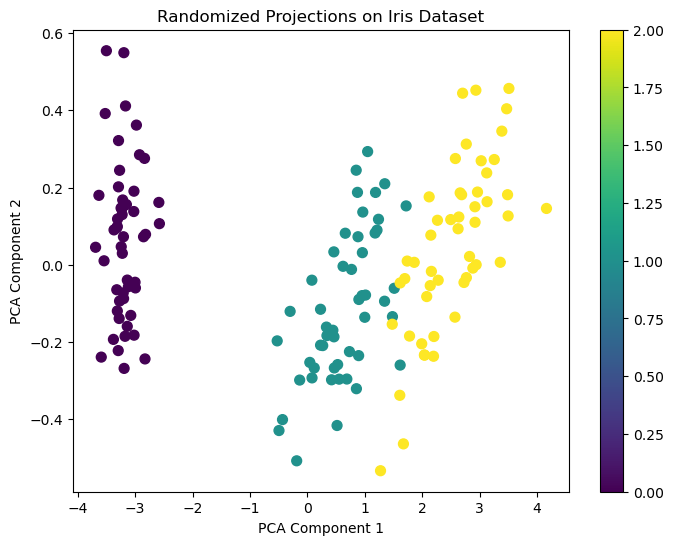

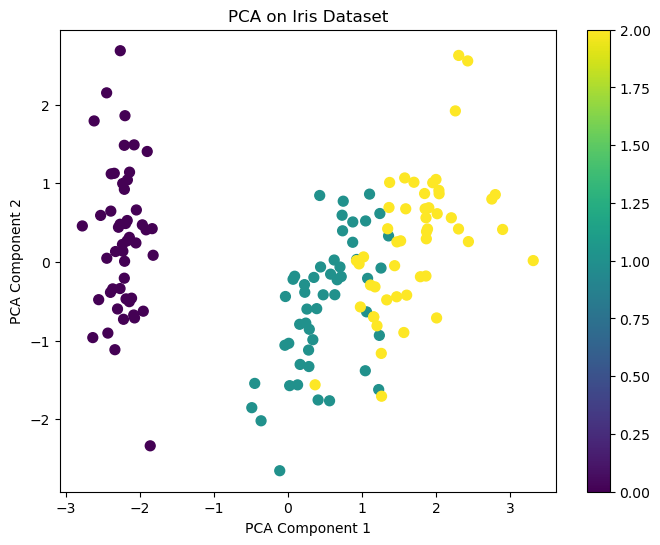

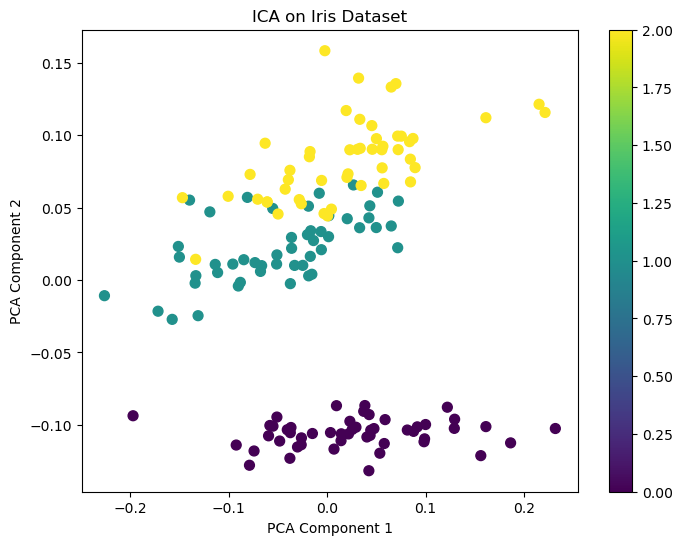

In [49]:
# Plot results for iris dataset
plot_2d_reduction(X_iris_rp, y_iris, "Randomized Projections on Iris Dataset")
plot_2d_reduction(X_iris_pca, y_iris, "PCA on Iris Dataset")
plot_2d_reduction(X_iris_ica, y_iris, "ICA on Iris Dataset")



In [50]:
# X_iris_pca.shape

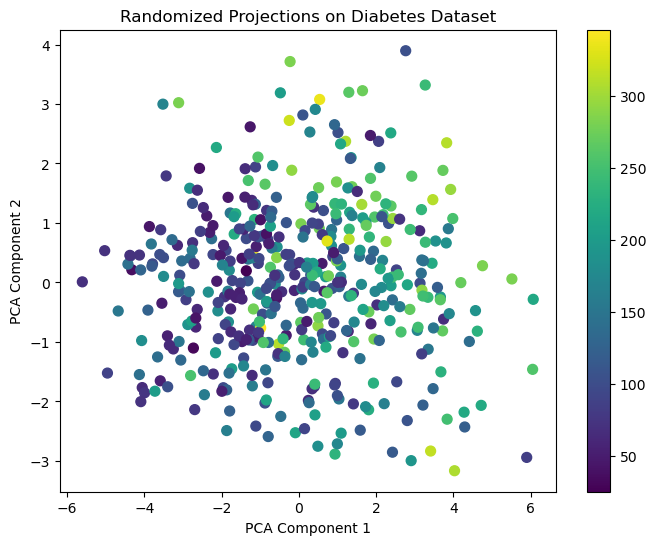

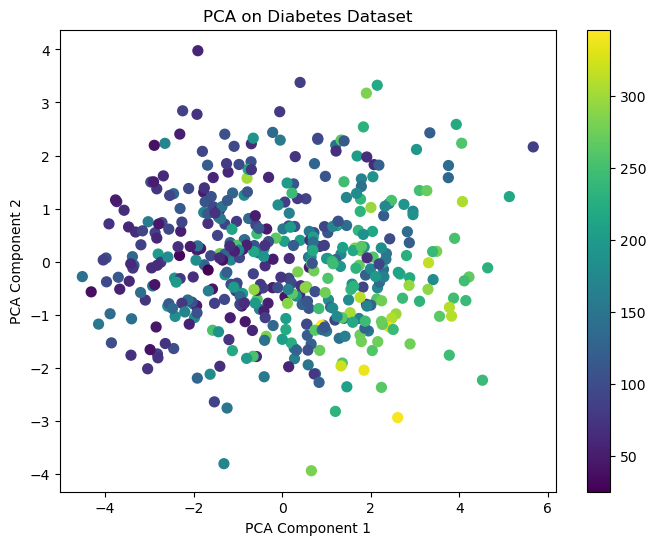

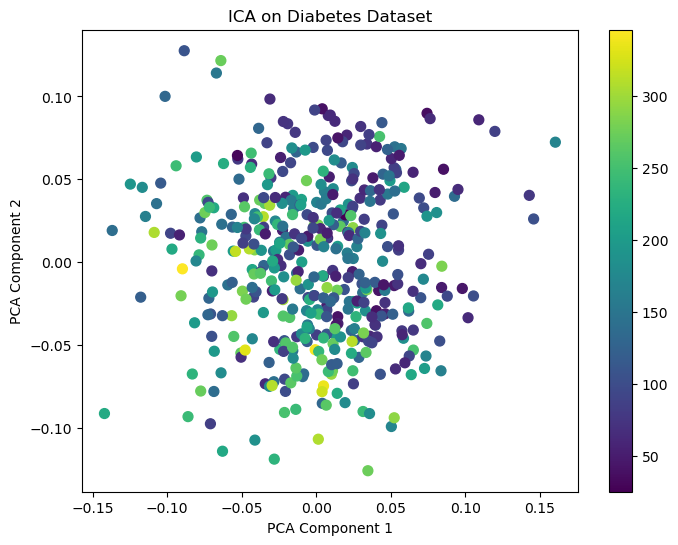

In [51]:
# Plot results for diabetes dataset
plot_2d_reduction(X_diabetes_rp, y_diabetes, "Randomized Projections on Diabetes Dataset")
plot_2d_reduction(X_diabetes_pca, y_diabetes, "PCA on Diabetes Dataset")
plot_2d_reduction(X_diabetes_ica, y_diabetes, "ICA on Diabetes Dataset")

In [52]:
y_diabetes

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28